# DataViz Project - Airplane Crashes Since 1908

## 2. Exploratory Data Analysis

### 2.1. The clean dataset

From the previous step, we can now use a clean version of the original dataset.

In [3]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np


file_path = "dataset/dataframe_export.csv"
df = pd.read_csv(file_path)
df

,Date,Time,Location,Latitude,Longitude,Operator,Type,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",38.882431,-77.080750,Military - U.S. Army,Wright Flyer III,2,1,0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"Atlantic City, New Jersey",39.362869,-74.426369,Military - U.S. Navy,Dirigible,5,5,0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",48.428551,-123.364448,Private,Curtiss seaplane,1,1,0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,North Sea,56.610554,4.387920,Military - German Navy,Zeppelin L-1 (airship),20,14,0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Johannisthal, Germany",52.799000,13.096050,Military - German Navy,Zeppelin L-2 (airship),30,30,0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",50.809681,4.930130,Military - German Navy,Zeppelin L-8 (airship),41,21,0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",53.858299,8.697810,Military - German Navy,Zeppelin L-10 (airship),19,19,0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Jambol, Bulgeria",42.487801,26.511030,Military - German Army,Schutte-Lanz S-L-10 (airship),20,20,0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",51.624851,0.416950,Military - German Navy,Zeppelin L-32 (airship),22,22,0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",51.693130,-0.178330,Military - German Navy,Zeppelin L-31 (airship),19,19,0,Shot down in flames by the British 39th Home D...


['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


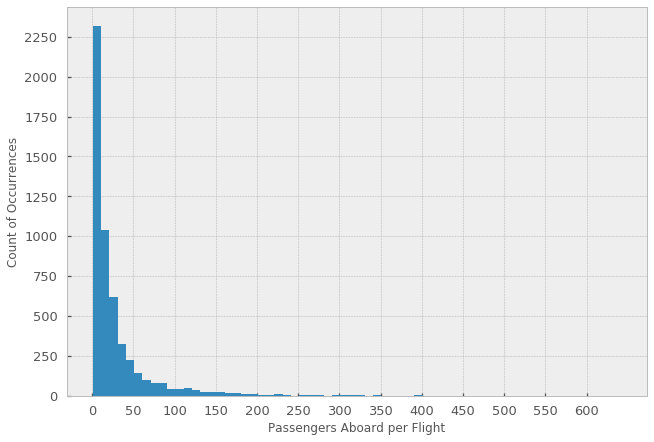

In [13]:
print(plt.style.available)
mp.style.use("bmh")

df["Aboard"].hist(bins = range(df["Aboard"].min(), df["Aboard"].max(), 10))
plt.ylabel("Count of Occurrences")
plt.xlabel("Passengers Aboard per Flight")
plt.yticks(range(0, 2500, 250))
plt.xticks(range(0, 650, 50))
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1226b8780>,
      dtype=object)

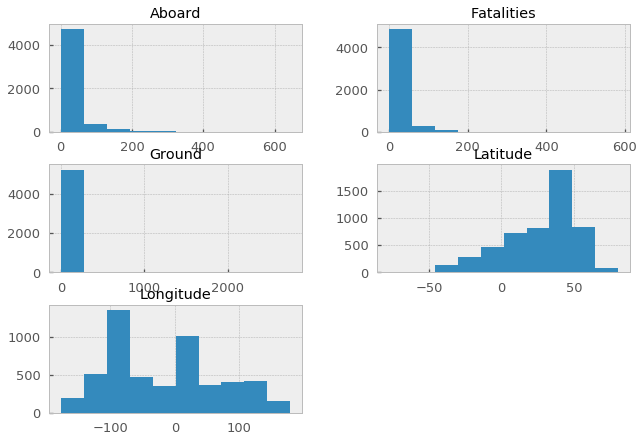

In [14]:
df.hist()